In [1]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
og_df = pd.read_csv('E:\\STUDY\\Final Year Project\\GWEAP\\Datasets\\Unfiltered\\weather datasets\\countries\\Germany.csv')
og_df = og_df.drop("Country", axis=1)
og_df.drop(og_df.filter(regex="Unname"), axis=1, inplace=True)
fullDf = og_df.copy()
og_df = og_df.head(10)
og_df

,dt,AverageTemperature
0,1743-11-01,5.468
1,1743-12-01,NaN
2,1744-01-01,NaN
3,1744-02-01,NaN
4,1744-03-01,NaN
5,1744-04-01,8.438
6,1744-05-01,11.498
7,1744-06-01,14.262
8,1744-07-01,16.293
9,1744-08-01,NaN


In [3]:
og_df.iloc[0]["AverageTemperature"]

5.468

In [4]:
# Generate Random NaNs in the dataframe
df = og_df.copy()
ix = [(row, 1) for row in range(df.shape[0]) for col in range(df.shape[1])]
for row, col in random.sample(ix, int(round(0.2*len(ix)))):
    df.iat[row, 1] = np.nan
df

,dt,AverageTemperature
0,1743-11-01,5.468
1,1743-12-01,NaN
2,1744-01-01,NaN
3,1744-02-01,NaN
4,1744-03-01,NaN
5,1744-04-01,8.438
6,1744-05-01,11.498
7,1744-06-01,14.262
8,1744-07-01,16.293
9,1744-08-01,NaN


In [5]:
# Filling method
newdf = df.interpolate()
if newdf["AverageTemperature"].isnull().values.any():
    newdf = newdf.fillna(method='bfill')
newdf

,dt,AverageTemperature
0,1743-11-01,5.468
1,1743-12-01,6.062
2,1744-01-01,6.656
3,1744-02-01,7.250
4,1744-03-01,7.844
5,1744-04-01,8.438
6,1744-05-01,11.498
7,1744-06-01,14.262
8,1744-07-01,16.293
9,1744-08-01,16.293


In [6]:
newset2 = df.fillna(method='ffill')
if newset2["AverageTemperature"].isnull().values.any():
    newset2 = newset2.fillna(method='bfill')
newset2

,dt,AverageTemperature
0,1743-11-01,5.468
1,1743-12-01,5.468
2,1744-01-01,5.468
3,1744-02-01,5.468
4,1744-03-01,5.468
5,1744-04-01,8.438
6,1744-05-01,11.498
7,1744-06-01,14.262
8,1744-07-01,16.293
9,1744-08-01,16.293


In [7]:
newset3 = df.fillna(method='bfill')
if newset3["AverageTemperature"].isnull().values.any():
    newset3 = newset3.fillna(method='ffill')
newset3

,dt,AverageTemperature
0,1743-11-01,5.468
1,1743-12-01,8.438
2,1744-01-01,8.438
3,1744-02-01,8.438
4,1744-03-01,8.438
5,1744-04-01,8.438
6,1744-05-01,11.498
7,1744-06-01,14.262
8,1744-07-01,16.293
9,1744-08-01,16.293


In [8]:
# Mean
meanFill = df.fillna(value=df["AverageTemperature"].mean())
meanFill

,dt,AverageTemperature
0,1743-11-01,5.4680
1,1743-12-01,11.1918
2,1744-01-01,11.1918
3,1744-02-01,11.1918
4,1744-03-01,11.1918
5,1744-04-01,8.4380
6,1744-05-01,11.4980
7,1744-06-01,14.2620
8,1744-07-01,16.2930
9,1744-08-01,11.1918


In [9]:
# Median
medianFill = df.fillna(value=df["AverageTemperature"].median())
medianFill

,dt,AverageTemperature
0,1743-11-01,5.468
1,1743-12-01,11.498
2,1744-01-01,11.498
3,1744-02-01,11.498
4,1744-03-01,11.498
5,1744-04-01,8.438
6,1744-05-01,11.498
7,1744-06-01,14.262
8,1744-07-01,16.293
9,1744-08-01,11.498


In [10]:
# Mode
modeFill = df.fillna(value=df["AverageTemperature"].mode()[0])
modeFill

,dt,AverageTemperature
0,1743-11-01,5.468
1,1743-12-01,5.468
2,1744-01-01,5.468
3,1744-02-01,5.468
4,1744-03-01,5.468
5,1744-04-01,8.438
6,1744-05-01,11.498
7,1744-06-01,14.262
8,1744-07-01,16.293
9,1744-08-01,5.468


In [11]:
# Euclidean Distance
def Euclidean_Dist(df1, df2, cols="AverageTemperature"):
    return np.linalg.norm(df1[cols].values - df2[cols].values)
data = {
    "Linear Interpolation": round(Euclidean_Dist(og_df, newdf), 3),
    "Forward Fill": round(Euclidean_Dist(og_df, newset2), 3),
    "Backward Fill": round(Euclidean_Dist(og_df, newset3), 3),
    "Mean": round(Euclidean_Dist(og_df, meanFill), 3),
    "Median": round(Euclidean_Dist(og_df, medianFill), 3),
    "Mode": round(Euclidean_Dist(og_df, modeFill), 3)
}

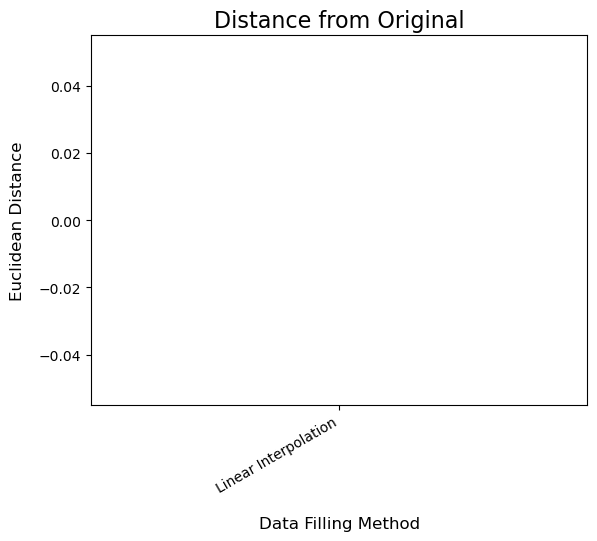

In [12]:
x = list(data.keys())
y = list(data.values())
plt.xlabel('Data Filling Method', labelpad=15, fontdict={'size': 12})
plt.ylabel('Euclidean Distance', labelpad=10, fontdict={'size': 12})
plt.title('Distance from Original', fontdict={'fontsize': 16})
ax = plt.subplot()
plt.bar(x, y)
plt.setp(ax.get_xticklabels(), rotation=30, ha='right')
plt.show()

In [13]:
# Filling whole dataset using linear interpolation
fullDf = fullDf.interpolate()
if fullDf["AverageTemperature"].isnull().values.any():
    fullDf = fullDf.fillna(method='bfill')
fullDf

,dt,AverageTemperature
0,1743-11-01,5.468
1,1743-12-01,6.062
2,1744-01-01,6.656
3,1744-02-01,7.250
4,1744-03-01,7.844
...,...,...
3234,2013-05-01,12.151
3235,2013-06-01,15.927
3236,2013-07-01,19.762
3237,2013-08-01,18.233


In [14]:
fullDf["AverageTemperature"] = fullDf["AverageTemperature"].round(decimals=3)
fullDf.head(10)

,dt,AverageTemperature
0,1743-11-01,5.468
1,1743-12-01,6.062
2,1744-01-01,6.656
3,1744-02-01,7.250
4,1744-03-01,7.844
5,1744-04-01,8.438
6,1744-05-01,11.498
7,1744-06-01,14.262
8,1744-07-01,16.293
9,1744-08-01,14.672


In [15]:
# converting string to datetime
fullDf["date"] = pd.to_datetime(fullDf["dt"])
fullDf.drop("dt", axis=1, inplace=True)
fullDf.to_csv('../../Processed Datasets/germany.csv', sep=',', index=False)
fullDf.set_index("date", inplace=True)
fullDf = fullDf['1970':'2012']
fullDf.head()

,AverageTemperature
date,
1970-01-01,-2.721
1970-02-01,-1.331
1970-03-01,1.234
1970-04-01,5.512
1970-05-01,11.665


In [16]:
df1 = fullDf.copy()
df1.columns = ["avgTemp"]
df1.head()
# df1 = pd.DataFrame()
# years = []
# for i in range(len(fullDf)):
#     years.append(fullDf.iloc[i]["dt"].year)
# years = list(set(years))

,avgTemp
date,
1970-01-01,-2.721
1970-02-01,-1.331
1970-03-01,1.234
1970-04-01,5.512
1970-05-01,11.665


In [17]:
df1.describe()

,avgTemp
count,516.000000
mean,8.871940
std,6.667084
min,-6.281000
25%,3.342750
50%,8.416500
75%,14.978000
max,22.343000


<AxesSubplot:xlabel='date'>

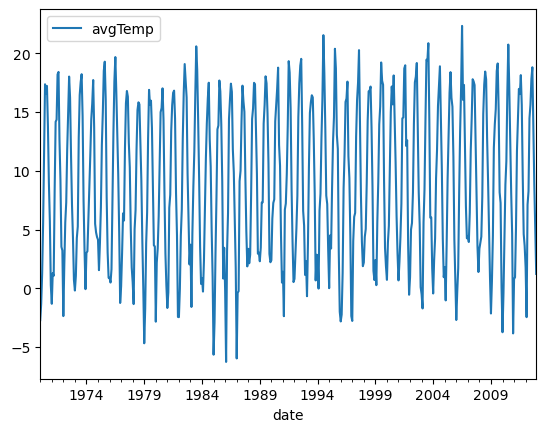

In [18]:
df1.plot()

# Testing for Stationarity:
### 1. Augmented Dickey-Fuller test:
#### Null Hypothesis: Series is not stationary.
#### Alternate Hypothesis: Series is stationary.

In [19]:
from statsmodels.tsa.stattools import adfuller


d:\Anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [20]:
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic','p-value','No. of Lags Used',
                                             'Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
adf_test(df1["avgTemp"])

Results of Dickey-Fuller Test:
Test Statistic                  -4.189253
p-value                          0.000687
No. of Lags Used                16.000000
Number of Observations Used    499.000000
Critical Value (1%)             -3.443523
Critical Value (5%)             -2.867350
Critical Value (10%)            -2.569864
dtype: float64


#### The p-value is lesser than the level of significance (0.05) and hence it is strong evidence against the null hypothesis and therefore we reject the null hypothesis. This indicates that our time series data is stationary.

### 2. KPSS (Kwiatkowski-Phillips-Schmidt-Shin) Test
#### Null Hypothesis: Series is stationary.
#### Alternate Hypothesis: Series is not stationary.

In [21]:
from statsmodels.tsa.stattools import kpss

def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression = 'c', nlags = 'legacy')
    kpss_output = pd.Series(kpsstest[0:3], index = ['Test Statistic','p-value','No. of Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)
kpss_test(df1["avgTemp"])

Results of KPSS Test:
Test Statistic            0.32264
p-value                   0.10000
No. of Lags Used         19.00000
Critical Value (10%)      0.34700
Critical Value (5%)       0.46300
Critical Value (2.5%)     0.57400
Critical Value (1%)       0.73900
dtype: float64


d:\Anaconda\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [22]:
y = df1['avgTemp'].resample('MS').mean()
y.head()

date
1970-01-01    -2.721
1970-02-01    -1.331
1970-03-01     1.234
1970-04-01     5.512
1970-05-01    11.665
Freq: MS, Name: avgTemp, dtype: float64

#### The p-value is greater than the level of significance (0.05) and hence it is weak evidence against the null hypothesis and therefore we fail to reject the null hypothesis. This indicates that our time series is stationary.

# Both ADF and KPSS tests are in agreement that the time series data is stationary.


In [23]:
train = y[:'2009']
test = y['2010':]

In [24]:
# from pmdarima.arima import auto_arima

# #The default values of several important parameters for auto_arima function are as follows:
# #max_p=5, max_d=2, max_q=5, max_P=2, max_D=1, max_Q=2

# arima_model = auto_arima(train, seasonal = True, m = 12, stepwise = False, trace = 1, random_state = 10)

In [25]:
import statsmodels.api as sm

model = sm.tsa.statespace.SARIMAX(train, order = (1, 0, 0), seasonal_order = (1, 0, 1, 12), 
                                  enforce_stationarity = False, enforce_invertibility = False)
fitted_model = model.fit(maxiter = 200, method = 'nm')
print(fitted_model.summary())

Optimization terminated successfully.
         Current function value: 1.928291
         Iterations: 179
         Function evaluations: 303
                                      SARIMAX Results                                       
Dep. Variable:                              avgTemp   No. Observations:                  480
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 12)   Log Likelihood                -925.580
Date:                              Mon, 08 May 2023   AIC                           1859.160
Time:                                      17:46:27   BIC                           1875.745
Sample:                                  01-01-1970   HQIC                          1865.686
                                       - 12-01-2009                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------

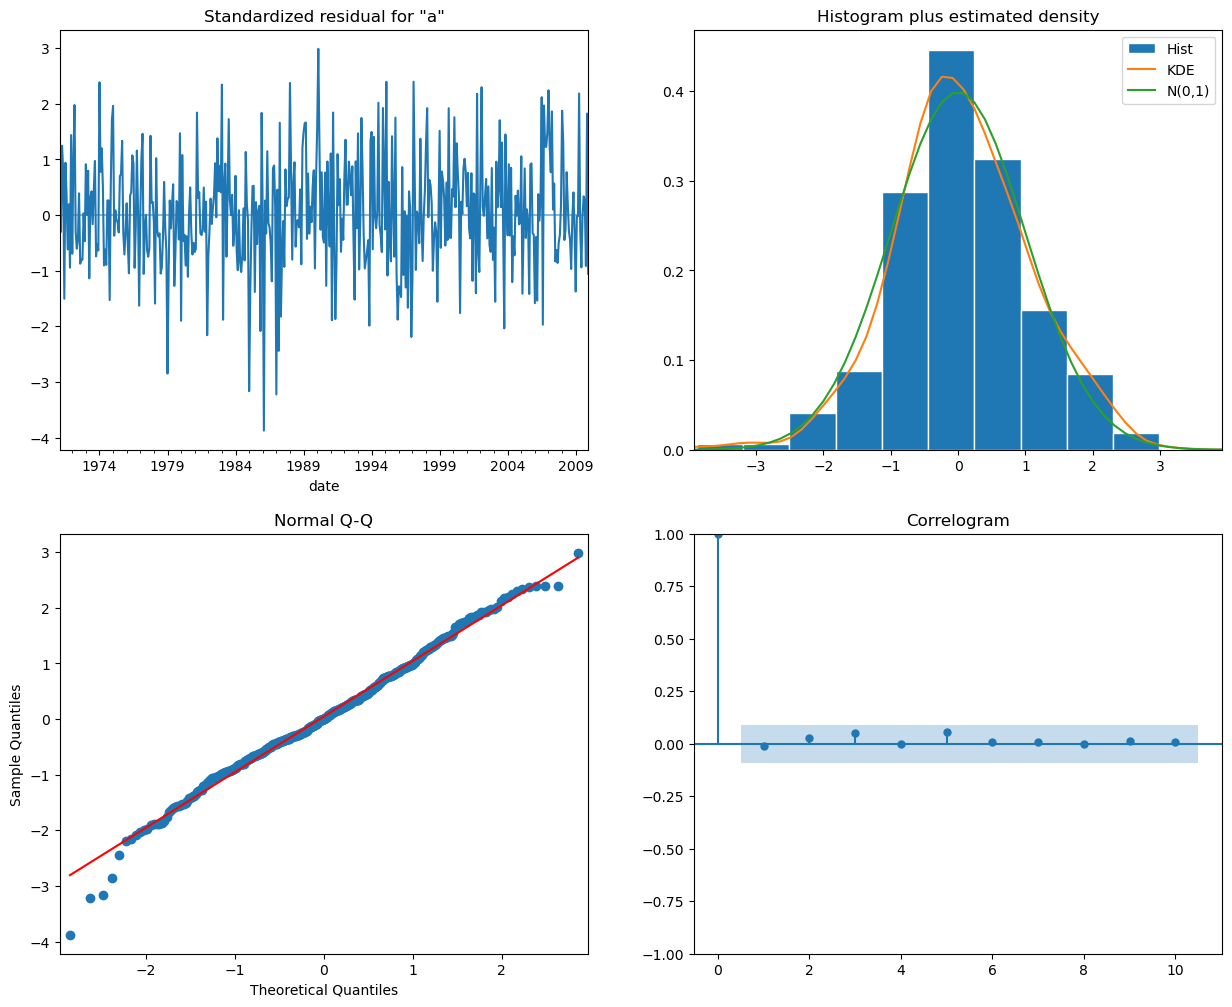

In [26]:
fitted_model.plot_diagnostics(figsize = (15, 12))
plt.show()

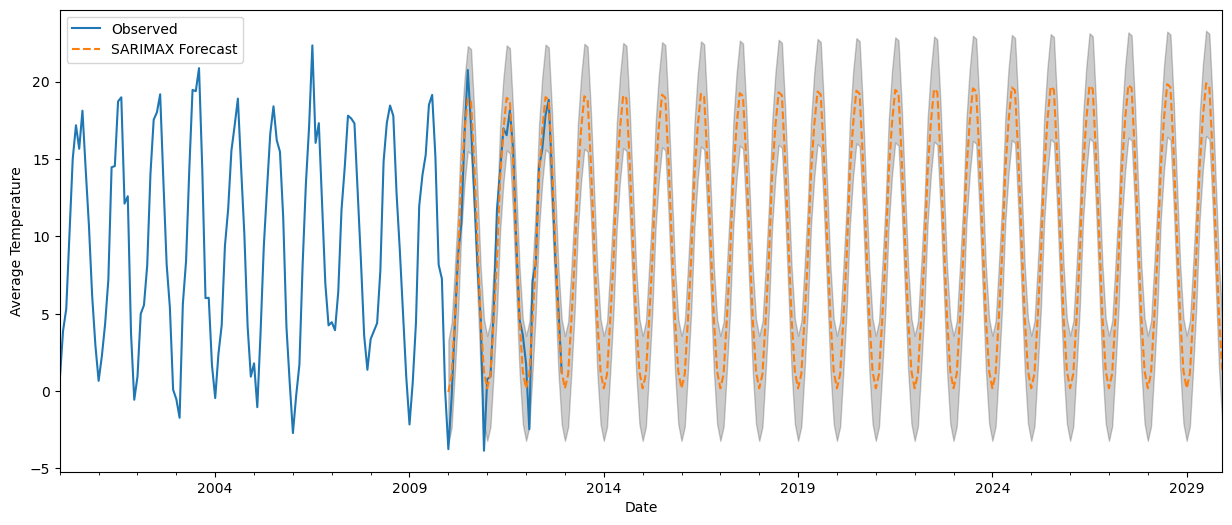

In [27]:
#Getting the SARIMAX forecast with number of steps as 36 since we want to make 3 year prediction and our data is monthly sampled.
pred = fitted_model.get_forecast(steps = 240)
#Plotting the observed and forecasted values:
ax1 = y['2000':].plot(label = 'Observed')
pred.predicted_mean.plot(ax = ax1, label = 'SARIMAX Forecast', figsize = (15, 6), linestyle = 'dashed')
#Finding the confidence intervals of the forecasts.
pred_ci = pred.conf_int()
ax1.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color = 'k', alpha = 0.2)
ax1.set_xlabel('Date')
ax1.set_ylabel('Average Temperature')
plt.legend(loc = 'upper left')
plt.show()

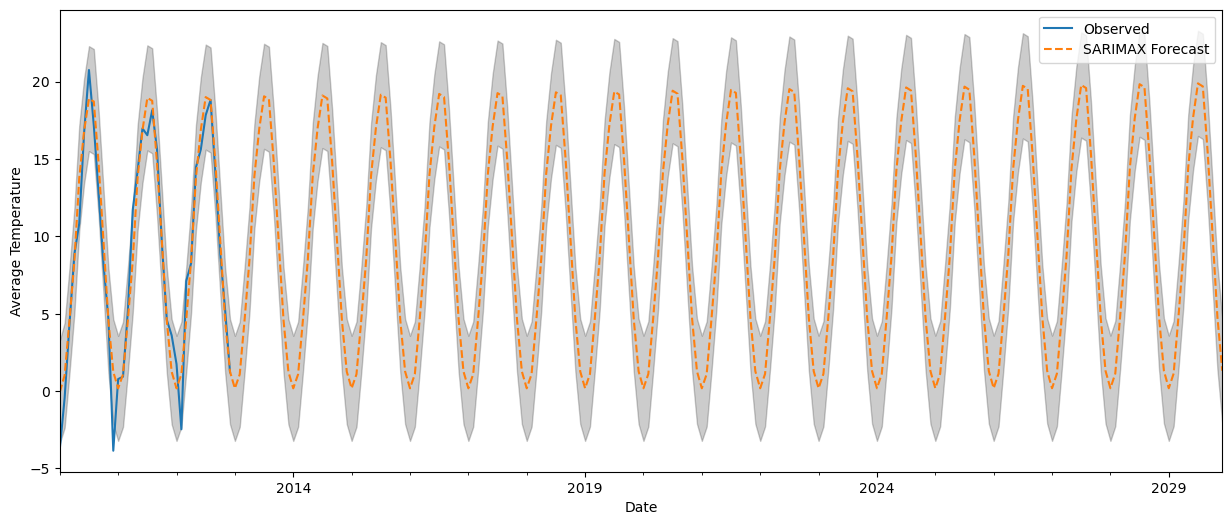

In [28]:
#Plotting the observed and forecasted values:
ax2 = y['2010':].plot(label = 'Observed')
pred.predicted_mean.plot(ax = ax2, label = 'SARIMAX Forecast', figsize = (15, 6), linestyle = 'dashed')
#Finding the confidence intervals of the forecasts.
pred_ci = pred.conf_int()
ax2.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color = 'k', alpha = 0.2)
ax2.set_xlabel('Date')
ax2.set_ylabel('Average Temperature')
plt.legend()
plt.show()

In [29]:
y_forecasted_SARIMAX = pred.predicted_mean
y_truth = test
mse_SARIMAX = ((y_forecasted_SARIMAX - y_truth) ** 2).mean()
print('The Mean Squared Error of SARIMAX forecast is {}'.format(round(mse_SARIMAX, 2)))
print('The Root Mean Squared Error of SARIMAX forecast is {}'.format(round(np.sqrt(mse_SARIMAX), 2)))

The Mean Squared Error of SARIMAX forecast is 3.13
The Root Mean Squared Error of SARIMAX forecast is 1.77


# The RMSE tells us that the SARIMAX model was able to forecast the monthly average temperature within 0.62°C of the true temperature.